In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bank.csv")
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
# y

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['age','balance','duration']] = scaler.fit_transform(x[['age','balance','duration']])

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [36]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [37]:
dt=DecisionTreeClassifier()

In [38]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1165
           1       0.77      0.77      0.77      1068

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



DecisionTreeClassifier()

In [39]:
dt.score(xtrain,ytrain)

1.0

In [40]:
dt.score(xtest,ytest)

0.7801164352888491

In [15]:
dt.feature_importances_

array([0.07877557, 0.03116152, 0.015859  , 0.01785681, 0.00072508,
       0.08070151, 0.03784805, 0.00618151, 0.06173459, 0.07576121,
       0.10059067, 0.35487009, 0.02620691, 0.05891702, 0.01485265,
       0.03795781])

## hyperparameter tunning

In [16]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1165
           1       0.79      0.83      0.81      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(max_depth=10)

In [17]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7098074339453649
2: 0.7098074339453649
3: 0.7751903269144649
4: 0.7832512315270936
5: 0.8051948051948052
6: 0.8051948051948052
7: 0.8150470219435737
8: 0.8137035378414689
9: 0.8101209135691895
10: 0.8101209135691895
11: 0.8163905060456784
12: 0.8101209135691895
13: 0.8150470219435737
14: 0.8011643528884909
15: 0.7948947604120018
16: 0.7922077922077922
17: 0.7971339005821765
18: 0.7899686520376176
19: 0.786833855799373
20: 0.7845947156291984
21: 0.7823555754590238
22: 0.7881773399014779
23: 0.7836990595611285
24: 0.7832512315270936
25: 0.7841468875951635
26: 0.7814599193909538
27: 0.7881773399014779
28: 0.7801164352888491
29: 0.7863860277653381
30: 0.7863860277653381
31: 0.786833855799373
32: 0.7832512315270936
33: 0.7886251679355127
34: 0.7863860277653381
35: 0.786833855799373
36: 0.7863860277653381
37: 0.7859381997313032
38: 0.787281683833408
39: 0.7890729959695477
40: 0.7814599193909538
41: 0.7841468875951635
42: 0.7886251679355127
43: 0.7823555754590238
44: 0.7836990595611285
4

In [18]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1165
           1       0.81      0.81      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



DecisionTreeClassifier(max_depth=11)

In [19]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1165
           1       0.81      0.80      0.80      1068

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



DecisionTreeClassifier(min_samples_leaf=10)

In [20]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7854903716972682
2: 0.7725033587102552
3: 0.7913121361397224
4: 0.7886251679355127
5: 0.7984773846842812
6: 0.8020600089565607
7: 0.8092252575011196
8: 0.8154948499776086
9: 0.8163905060456784
10: 0.8137035378414689
11: 0.8226600985221675
12: 0.8298253470667264
13: 0.825794894760412
14: 0.8217644424540976
15: 0.8231079265562025
16: 0.8231079265562025
17: 0.8311688311688312
18: 0.8334079713390058
19: 0.8351992834751455
20: 0.8338557993730408
21: 0.8343036274070756
22: 0.8334079713390058
23: 0.8298253470667264
24: 0.8316166592028661
25: 0.8289296909986565
26: 0.8280340349305867
27: 0.8262427227944469
28: 0.825794894760412
29: 0.8262427227944469
30: 0.8248992386923422
31: 0.8244514106583072
32: 0.8240035826242723
33: 0.825794894760412
34: 0.8231079265562025
35: 0.8213166144200627
36: 0.8208687863860278
37: 0.8163905060456784
38: 0.8163905060456784
39: 0.8199731303179579
40: 0.8199731303179579
41: 0.8199731303179579
42: 0.819525302283923
43: 0.819525302283923
44: 0.8208687863860278
45

In [21]:
dt5=DecisionTreeClassifier(min_samples_leaf=20)
mymodel(dt5)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1165
           1       0.82      0.83      0.83      1068

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



DecisionTreeClassifier(min_samples_leaf=20)

In [22]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=20)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1165
           1       0.82      0.83      0.83      1068

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



DecisionTreeClassifier(min_samples_leaf=20)

In [23]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=20,max_depth=11)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1165
           1       0.82      0.83      0.82      1068

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=20)

In [24]:
dt10=DecisionTreeClassifier(max_depth=2)
mymodel(dt10)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1165
           1       0.66      0.81      0.73      1068

    accuracy                           0.71      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.72      0.71      0.71      2233



DecisionTreeClassifier(max_depth=2)

In [25]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

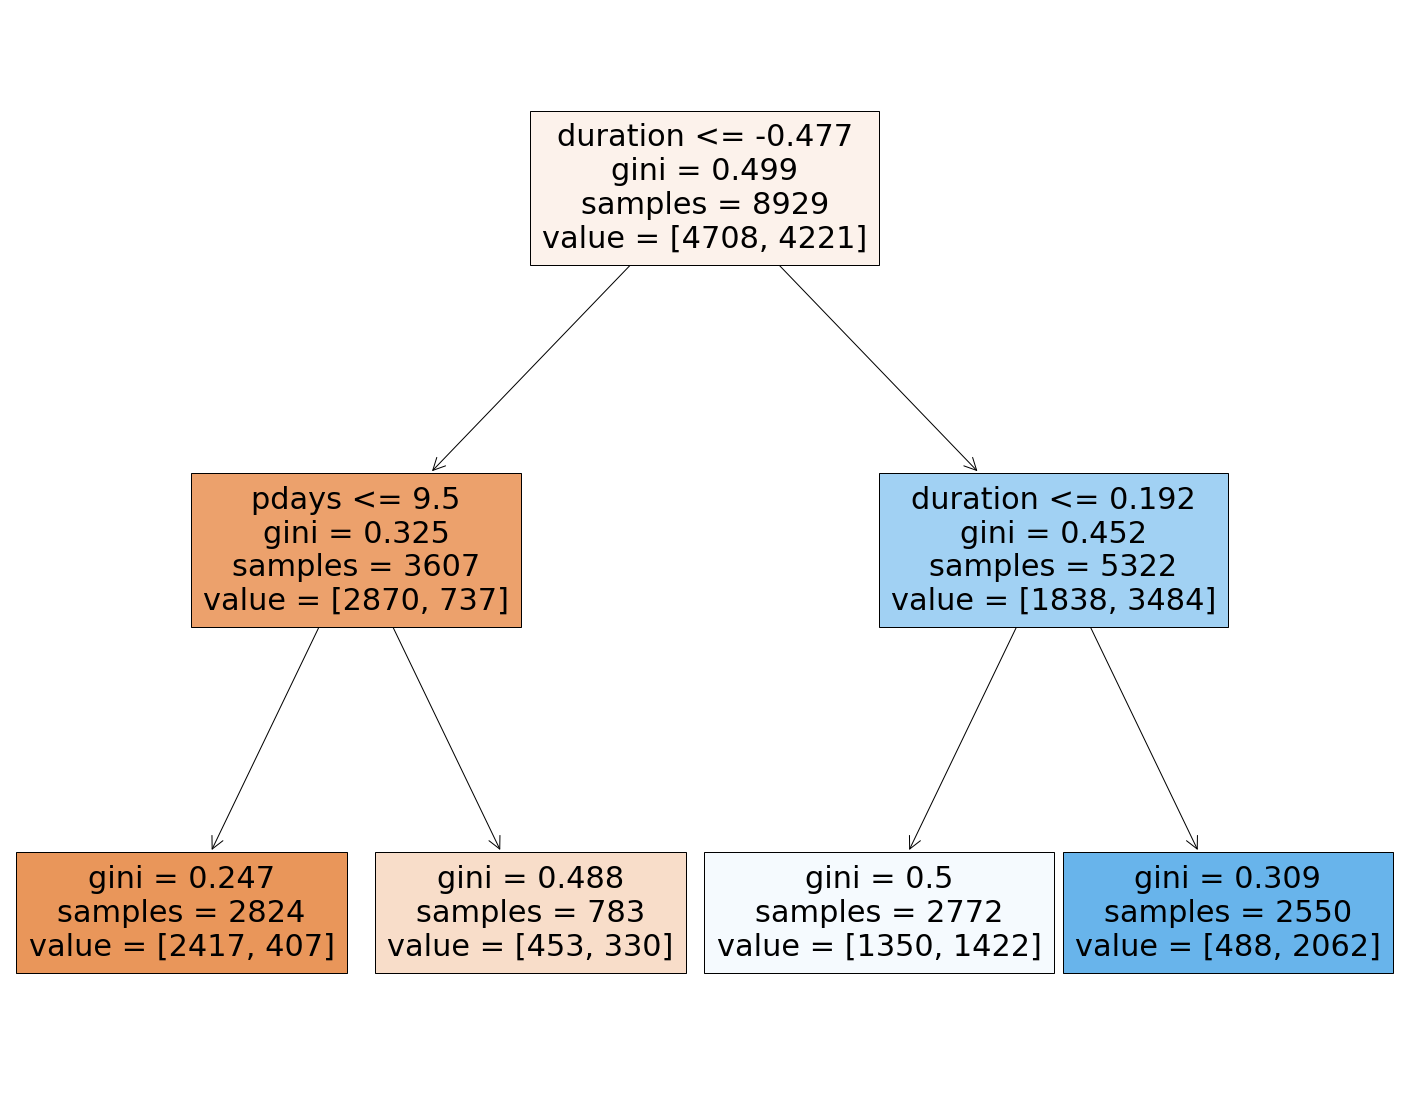

In [41]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t = tree.plot_tree(dt10,filled=True,feature_names=x.columns)

In [27]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7,10],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [28]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7, 10],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [29]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50}

In [30]:
my_best_preds = grid_search.predict(xtest)

In [31]:
accuracy_score(ytest, my_best_preds)

0.8190774742498881

In [32]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1165
           1       0.82      0.80      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233

